In [6]:
import numpy as np
import sklearn.preprocessing as sp
samples = np.array([[1,3,2],
[7,5,4],
[1,8,6],
[7,3,9]])
ohe = sp.OneHotEncoder(sparse_output = True ,dtype = 'int32')
result = ohe.fit_transform(samples)
print(result)

  (0, 0)	1
  (0, 2)	1
  (0, 5)	1
  (1, 1)	1
  (1, 3)	1
  (1, 6)	1
  (2, 0)	1
  (2, 4)	1
  (2, 7)	1
  (3, 1)	1
  (3, 2)	1
  (3, 8)	1


In [7]:
import numpy as np
import sklearn.preprocessing as sp
raw_samples = np.array(['audi','ford','audi','toyota','ford','bmw','ford','redflag','audi'])
print(raw_samples)
lbe = sp.LabelEncoder()
result = lbe.fit_transform(raw_samples)
print(result)
test = [0,0,1,1,4]
print(lbe.inverse_transform(test))  #转换成开始的定义

['audi' 'ford' 'audi' 'toyota' 'ford' 'bmw' 'ford' 'redflag' 'audi']
[0 2 0 4 2 1 2 3 0]
['audi' 'audi' 'bmw' 'bmw' 'toyota']


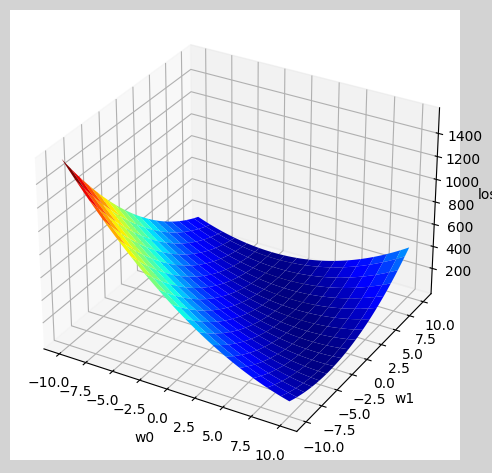

In [9]:
import numpy as np
import matplotlib.pyplot as mp

xs = np.array([0.5, 0.6, 0.8, 1.1, 1.4])
ys = np.array([5.0, 5.5, 6.0, 6.8, 7.0])
n = 500
w0_grid,w1_grid = np.meshgrid(np.linspace(-10, 10, n),np.linspace(-10, 10, n))
loss = 0
for x,y in zip(xs,ys):
    loss += (w0_grid + w1_grid * x - y)**2 / 2
    
#画图：
fig = mp.figure('Loss Function', facecolor='lightgray')
ax3d = fig.add_subplot(projection='3d')
ax3d.set_xlabel('w0')
ax3d.set_ylabel('w1')
ax3d.set_zlabel('loss')
ax3d.plot_surface(w0_grid, w1_grid, loss, cstride=30, rstride=30, cmap='jet')
mp.tight_layout()
mp.show()

   1> w0=1.00000000, w1=1.00000000, loss=88.35000000
   2> w0=1.20900000, w1=1.19060000, loss=73.07765587
   3> w0=1.39916360, w1=1.36357948, loss=60.46337332
   4> w0=1.57220792, w1=1.52054607, loss=50.04445486
   5> w0=1.72969350, w1=1.66296078, loss=41.43874673
   6> w0=1.87303855, w1=1.79215140, loss=34.33061833
   7> w0=2.00353196, w1=1.90932461, loss=28.45938221
   8> w0=2.12234508, w1=2.01557706, loss=23.60972988
   9> w0=2.23054244, w1=2.11190537, loss=19.60383254
  10> w0=2.32909148, w1=2.19921529, loss=16.29481677
  11> w0=2.41887143, w1=2.27832995, loss=13.56137606
  12> w0=2.50068134, w1=2.34999742, loss=11.30332020
  13> w0=2.57524739, w1=2.41489755, loss=9.43789953
  14> w0=2.64322953, w1=2.47364820, loss=7.89676894
  15> w0=2.70522753, w1=2.52681085, loss=6.62348045
  16> w0=2.76178648, w1=2.57489580, loss=5.57141221
  17> w0=2.81340174, w1=2.61836680, loss=4.70205802
  18> w0=2.86052351, w1=2.65764531, loss=3.98361459
  19> w0=2.90356094, w1=2.69311435, loss=3.38981476


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12636\1946013119.py:40: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  mp.subplot(311)   # 3行1列第一幅


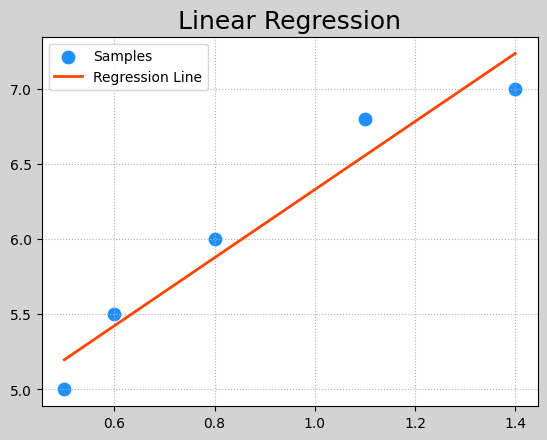

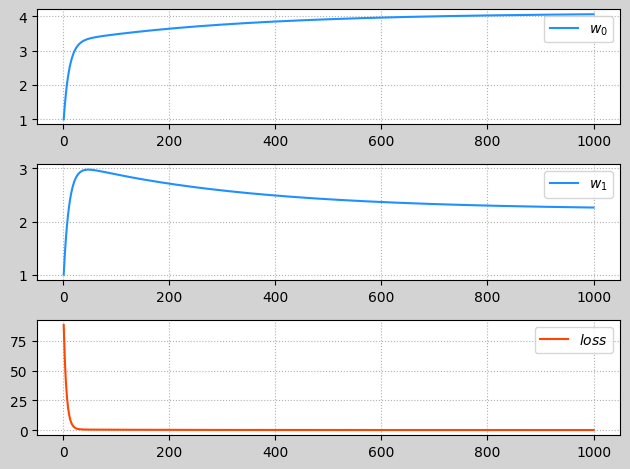

In [10]:
import numpy as np
import matplotlib.pyplot as mp
#from matplotlib.gridspec import GridSpec  ???

train_x = np.array([0.5, 0.6, 0.8, 1.1, 1.4])
train_y = np.array([5.0, 5.5, 6.0, 6.8, 7.0])

w0, w1, epoches = [1], [1], []
times = 1000         #梯度下降次数
lrate = 0.01         #learning rate
losses = []
for i in range(1, times + 1):
    epoches.append(i)
    #求损失值
    loss = ((w0[-1] + w1[-1] * train_x - train_y)**2).sum()
    losses.append(loss)
    print('{:4}> w0={:.8f}, w1={:.8f}, loss={:.8f}'.format(i,w0[-1],w1[-1],loss))
    #求损失函数关于w0,w1的偏导数，更新模型参数
    d0 = (w0[-1] + w1[-1] * train_x - train_y).sum()
    d1 = (train_x * (w0[-1] + w1[-1] * train_x - train_y)).sum()
    #梯度下降公式
    w0.append(w0[-1] - lrate * d0)
    w1.append(w1[-1] - lrate * d1)
print("w0:",w0[-1])
print("w1:",w1[-1])         # y = w0 + w1 * x
#绘制回归线
linex = np.linspace(train_x.min(), train_x.max(), 100)
liney = w1[-1] * linex + w0[-1]
#画图：
mp.figure('Linear Regression', facecolor='lightgray')
mp.title('Linear Regression', fontsize = 18)
mp.grid(linestyle=":")
mp.scatter(train_x, train_y, s=80, marker='o', color='dodgerblue',label='Samples')
mp.plot(linex, liney, color='orangered', linewidth=2, label='Regression Line')
mp.legend()   #图例

# 训练过程图，看到训练次数的上限：
mp.figure('training progress', facecolor='lightgray')
mp.title('Training Progress',fontsize=18)
mp.subplot(311)   # 3行1列第一幅
mp.grid(linestyle=':')
mp.plot(epoches, w0[:-1], color='dodgerblue', label=r'$w_0$')
mp.legend()

mp.subplot(312)   # 3行1列第一幅
mp.grid(linestyle=':')
mp.plot(epoches, w1[:-1], color='dodgerblue', label=r'$w_1$')
mp.legend()
mp.tight_layout()

mp.subplot(313)   # 3行1列第一幅
mp.grid(linestyle=':')
mp.plot(epoches, losses, color='orangered', label=r'$loss$')
mp.legend()
mp.tight_layout()

mp.show()

FileNotFoundError: name_of_file not found.